In [32]:
# load dataset
dataset = pd.read_csv('a.csv', header=0, usecols=['Open','High','Low','Close'])
# dataset['avg'] = dataset.mean(axis=1)

In [6]:
dataset = pd.read_csv('EURUSD.csv', header=0, usecols=['Open','High','Low','Close'])

In [7]:
dataset

,Open,High,Low,Close
0,1.146132,1.149700,1.134572,1.146171
1,1.131734,1.140914,1.131734,1.131811
2,1.139095,1.141774,1.134816,1.139108
3,1.141292,1.147447,1.140524,1.141044
4,1.147934,1.148633,1.142465,1.147974
...,...,...,...,...
776,1.132464,1.134430,1.130838,1.132734
777,1.132387,1.133500,1.130416,1.132426
778,1.132978,1.133600,1.129038,1.133003
779,1.131337,1.137001,1.127536,1.131478


<Axes: >

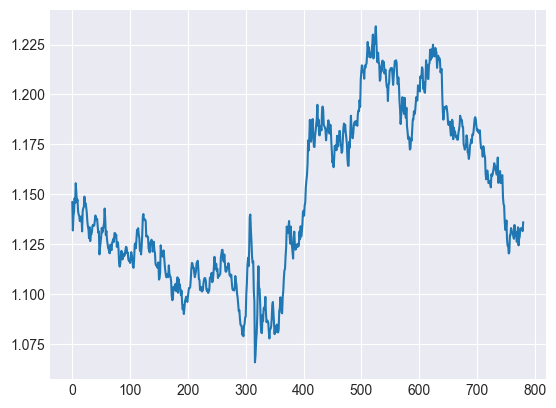

In [8]:
dataset.Close.plot()

In [9]:
def process_feature(dataframe, col_name, laging_period, forecast_period):
    data = pd.DataFrame()

    for i in range(laging_period, 0, -1):
        data['(t-'+str(i)+')'] = dataframe[col_name].shift(i)

    for i in range(0, forecast_period):
        data['(t+'+str(i)+')'] = dataframe[col_name].shift(-i)

    if dropnan:
        data.dropna(inplace=True)
    return data


In [10]:
timestamp_frame = process_feature(dataset, 'Close', n_hours, n_ahead)

timestamp_frame

,(t-10),(t-9),(t-8),(t-7),(t-6),(t-5),(t-4),(t-3),(t-2),(t-1),(t+0),(t+1),(t+2),(t+3),(t+4)
10,1.146171,1.131811,1.139108,1.141044,1.147974,1.145607,1.155495,1.151013,1.146014,1.147289,1.141683,1.139809,1.139264,1.136557,1.136932
11,1.131811,1.139108,1.141044,1.147974,1.145607,1.155495,1.151013,1.146014,1.147289,1.141683,1.139809,1.139264,1.136557,1.136932,1.136402
12,1.139108,1.141044,1.147974,1.145607,1.155495,1.151013,1.146014,1.147289,1.141683,1.139809,1.139264,1.136557,1.136932,1.136402,1.138822
13,1.141044,1.147974,1.145607,1.155495,1.151013,1.146014,1.147289,1.141683,1.139809,1.139264,1.136557,1.136932,1.136402,1.138822,1.131350
14,1.147974,1.145607,1.155495,1.151013,1.146014,1.147289,1.141683,1.139809,1.139264,1.136557,1.136932,1.136402,1.138822,1.131350,1.141305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,1.130480,1.128668,1.127650,1.134559,1.129331,1.131183,1.128541,1.126126,1.129076,1.133414,1.124354,1.127752,1.128757,1.132888,1.132734
773,1.128668,1.127650,1.134559,1.129331,1.131183,1.128541,1.126126,1.129076,1.133414,1.124354,1.127752,1.128757,1.132888,1.132734,1.132426
774,1.127650,1.134559,1.129331,1.131183,1.128541,1.126126,1.129076,1.133414,1.124354,1.127752,1.128757,1.132888,1.132734,1.132426,1.133003
775,1.134559,1.129331,1.131183,1.128541,1.126126,1.129076,1.133414,1.124354,1.127752,1.128757,1.132888,1.132734,1.132426,1.133003,1.131478


In [11]:
#dataset.drop('dma', axis=1, inplace=True)
#print("column number")
#print(dataset.columns,len(dataset.columns),len(dataset.index))


dt = timestamp_frame.values
d = dt.astype(float)

print("Checkinf for NaN and Inf")
print( "np.nan=", np.where(np.isnan(d)))
print( "is.inf=", np.where(np.isinf(d)))

print("********************************************")
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(d)
d = imp.fit_transform(d)

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(d)
print("scaled values",scaled)



Checkinf for NaN and Inf
np.nan= (array([], dtype=int64), array([], dtype=int64))
is.inf= (array([], dtype=int64), array([], dtype=int64))
********************************************
scaled values [[0.47771981 0.39243141 0.4357698  ... 0.43669514 0.42062299 0.42284821]
 [0.39243141 0.4357698  0.44727185 ... 0.42062299 0.42284821 0.41970189]
 [0.4357698  0.44727185 0.48842537 ... 0.42284821 0.41970189 0.43407486]
 ...
 [0.36772103 0.40875207 0.37770445 ... 0.3979134  0.39608536 0.39951418]
 [0.40875207 0.37770445 0.38870595 ... 0.39608536 0.39951418 0.39045399]
 [0.37770445 0.38870595 0.37301116 ... 0.39951418 0.39045399 0.41740162]]


In [12]:
reframed = pd.DataFrame(scaled)

# split into train and test sets
values = reframed.values
train_size = int(len(values) * train_data_percent)
test_size = len(values) - train_size
train, test = values[0:train_size,:], values[train_size:len(reframed),:]

# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -n_features]
test_X, test_y = test[:, :n_obs], test[:, -n_features]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

(690, 10) 690 (690,)


In [13]:
from numpy import concatenate
from matplotlib import pyplot
from tqdm import trange  
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, RepeatVector, TimeDistributed
from tensorflow.keras.models import load_model

In [14]:
model = Sequential()

batchsize = 20
# design network
model.add(Bidirectional(LSTM(50,  activation='relu', input_shape=(n_hours, n_features), return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(20, activation='relu'))
model.add(Dense(n_ahead))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=batchsize, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Epoch 1/20
35/35 - 2s - loss: 0.3253 - val_loss: 0.2511 - 2s/epoch - 66ms/step
Epoch 2/20
35/35 - 0s - loss: 0.2058 - val_loss: 0.1508 - 172ms/epoch - 5ms/step
Epoch 3/20
35/35 - 0s - loss: 0.1375 - val_loss: 0.0612 - 152ms/epoch - 4ms/step
Epoch 4/20
35/35 - 0s - loss: 0.0950 - val_loss: 0.0554 - 170ms/epoch - 5ms/step
Epoch 5/20
35/35 - 0s - loss: 0.0986 - val_loss: 0.0695 - 171ms/epoch - 5ms/step
Epoch 6/20
35/35 - 0s - loss: 0.1010 - val_loss: 0.0809 - 160ms/epoch - 5ms/step
Epoch 7/20
35/35 - 0s - loss: 0.0979 - val_loss: 0.0577 - 167ms/epoch - 5ms/step
Epoch 8/20
35/35 - 0s - loss: 0.0810 - val_loss: 0.0418 - 175ms/epoch - 5ms/step
Epoch 9/20
35/35 - 0s - loss: 0.0780 - val_loss: 0.0457 - 217ms/epoch - 6ms/step
Epoch 10/20
35/35 - 0s - loss: 0.0809 - val_loss: 0.0489 - 191ms/epoch - 5ms/step
Epoch 11/20
35/35 - 0s - loss: 0.0827 - val_loss: 0.0557 - 166ms/epoch - 5ms/step
Epoch 12/20
35/35 - 0s - loss: 0.0839 - val_loss: 0.0541 - 169ms/epoch - 5ms/step
Epoch 13/20
35/35 - 0s - lo

In [15]:
# make a prediction
yhat = model.predict(test_X)
test_X.shape

yhat.shape

3/3 [==============================] - 0s 4ms/step


(77, 5)

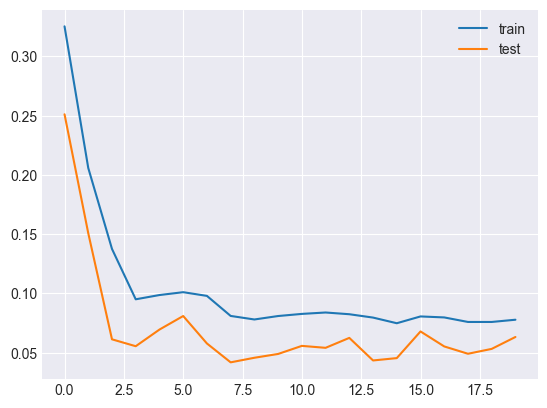

In [16]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [17]:
# evaluate the model
scores = model.evaluate(train_X, train_y, verbose=0)
print(model.metrics_names, scores*100)

['loss'] 6.69146254658699


In [18]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [19]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")


Loaded model from disk


In [20]:
# make a prediction
yhat = loaded_model.predict(test_X)

3/3 [==============================] - 0s 4ms/step


In [21]:
def plot(testdata_X, n_hours, n_features, prediction):
    testdata_X = testdata_X.reshape((testdata_X.shape[0], n_hours*n_features))
    forecast_y = concatenate([testdata_X[:, -1], prediction[-1,:]])
    pyplot.plot(forecast_y, color='red')
    pyplot.plot(testdata_X[:, -1], color='blue')

In [45]:
test_X.shape

(1185, 10, 1)

In [22]:
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))

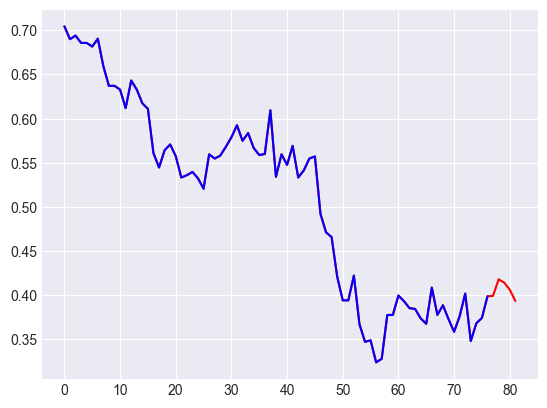

In [23]:
plot(test_X, n_hours, n_features, yhat)

1/1 [==============================] - 0s 21ms/step
Loop Number:  0
2/2 [==============================] - 0s 3ms/step
Loop Number:  1
2/2 [==============================] - 0s 2ms/step
Loop Number:  2
3/3 [==============================] - 0s 2ms/step
Loop Number:  3
3/3 [==============================] - 0s 2ms/step
Loop Number:  4
3/3 [==============================] - 0s 2ms/step
Loop Number:  5


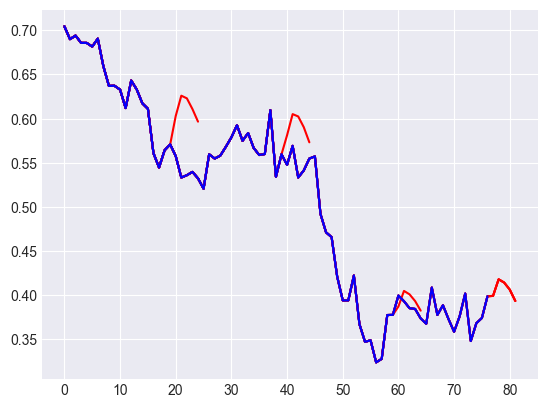

<Figure size 1500x700 with 0 Axes>

In [25]:
input_size = 20
k=20
j=0
m = 0
for i in range(input_size, (test_X.shape[0]//n_hours)*input_size, input_size):
    predict = loaded_model.predict(test_X[:i,:,:])
    plot(test_X[:i,:,:], n_hours, n_features, predict)
    if k < j:
        break
    else:
        print('Loop Number: ', j)
        j+=1
    m = i
pyplot.figure(figsize=(15,7))
pyplot.show()

In [67]:
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -n_hours:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -n_hours:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.053


In [72]:
inverse_yhat = np.concatenate([inv_y[0:10], inv_yhat])

In [53]:
inv_yhat[0:10]

array([0.30580243, 0.30785638, 0.31080881, 0.3152746 , 0.31851432,
       0.31977153, 0.32004172, 0.31861901, 0.3194522 , 0.32127383])

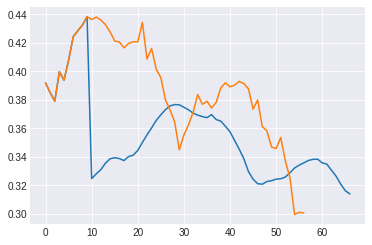

In [73]:
pyplot.plot(inverse_yhat)
pyplot.plot(inv_y)
pyplot.show()